# Multivarite Data Analysis

* __Student:__ Theodoro Gasperin Terra Camargo
* __Number:__  r0974221

## Info about the data: 
https://github.com/mulhod/steam_reviews

## Reserch Questions:

Can I uncover distinct reviewer personas by means of clustering.

#### Importing Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sqlite3

## Data Preprocessing:

Converting our data into a pandas df

In [3]:
df = pd.read_json('Grand_Theft_Auto_V.jsonlines', lines=True)

In [4]:
df.head(1)

,num_found_funny,review_url,num_guides,total_game_hours,num_workshop_items,num_found_unhelpful,steam_id_number,username,num_found_helpful,total_game_hours_last_two_weeks,...,num_games_owned,friend_player_level,date_updated,found_helpful_percentage,num_screenshots,review,achievement_progress,num_voted_helpfulness,num_badges,num_friends
0,5,http://steamcommunity.com/profiles/76561198010...,0,116.0,0,161,76561198010454100,God,1199,6.2,...,42,5.0,None,0.881618,0,"Well, hackers got to the point where they use ...","{'num_achievements_possible': 60, 'num_achieve...",1360,2.0,11.0


In [5]:
df.shape

(13349, 27)

In [6]:
df.columns

Index(['num_found_funny', 'review_url', 'num_guides', 'total_game_hours',
       'num_workshop_items', 'num_found_unhelpful', 'steam_id_number',
       'username', 'num_found_helpful', 'total_game_hours_last_two_weeks',
       'date_posted', 'num_comments', 'profile_url', 'rating', 'num_reviews',
       'orig_url', 'num_groups', 'num_games_owned', 'friend_player_level',
       'date_updated', 'found_helpful_percentage', 'num_screenshots', 'review',
       'achievement_progress', 'num_voted_helpfulness', 'num_badges',
       'num_friends'],
      dtype='object')

In [7]:
columns_drop = ['review_url', 'steam_id_number', 'username', 'date_posted', 'profile_url', 'orig_url', 'date_updated']
#columns_drop = ['review_url', 'username', 'profile_url', 'orig_url', 'date_updated']

In [8]:
# Drop columns
df.drop(columns=columns_drop, inplace=True)

In [9]:
df.shape

(13349, 20)

Changes rating to numerical categories

In [10]:
print(df['rating'].unique())
df['rating'] = df['rating'].apply(lambda x: 1 if x == 'Recommended' else 0)
print(df['rating'].unique())

['Not Recommended' 'Recommended']
[0 1]


Extracting achievenments

In [11]:
# Normalize the 'achievement_progress' column
achievement_df = pd.json_normalize(df['achievement_progress'])

# Concatenate the new dataframe with the original dataframe
df = pd.concat([df, achievement_df], axis=1)

# Drop the original 'achievement_progress' column
df.drop(columns=['achievement_progress', 'num_achievements_possible', 'num_achievements_attained'], inplace=True)
#df.drop(columns=['achievement_progress'], inplace=True)


In [12]:
# Display the columns types
print(df.dtypes)

num_found_funny                      int64
num_guides                           int64
total_game_hours                   float64
num_workshop_items                   int64
num_found_unhelpful                  int64
num_found_helpful                    int64
total_game_hours_last_two_weeks    float64
num_comments                         int64
rating                               int64
num_reviews                          int64
num_groups                         float64
num_games_owned                      int64
friend_player_level                float64
found_helpful_percentage           float64
num_screenshots                      int64
review                              object
num_voted_helpfulness                int64
num_badges                         float64
num_friends                        float64
num_achievements_percentage        float64
dtype: object


In [13]:
df.shape

(13349, 20)

Removing missing values

In [14]:
missing_values = df.isnull().sum()
print(missing_values)

num_found_funny                       0
num_guides                            0
total_game_hours                      0
num_workshop_items                    0
num_found_unhelpful                   0
num_found_helpful                     0
total_game_hours_last_two_weeks       0
num_comments                          0
rating                                0
num_reviews                           0
num_groups                         3267
num_games_owned                       0
friend_player_level                2003
found_helpful_percentage           2119
num_screenshots                       0
review                                0
num_voted_helpfulness                 0
num_badges                         2003
num_friends                        2124
num_achievements_percentage        2160
dtype: int64


In [15]:
df.dropna(inplace=True)
df.shape

(8389, 20)

### Sqlite database for querying

In [15]:
# Creating a SQLite database
dbfile = os.path.join('database.sqlite')
db = sqlite3.connect(dbfile)

In [16]:
df.to_sql('gta5_reviews', db, if_exists='replace', index=False)

8389

## Multivarite Analysis

In [16]:
df.columns

Index(['num_found_funny', 'num_guides', 'total_game_hours',
       'num_workshop_items', 'num_found_unhelpful', 'num_found_helpful',
       'total_game_hours_last_two_weeks', 'num_comments', 'rating',
       'num_reviews', 'num_groups', 'num_games_owned', 'friend_player_level',
       'found_helpful_percentage', 'num_screenshots', 'review',
       'num_voted_helpfulness', 'num_badges', 'num_friends',
       'num_achievements_percentage'],
      dtype='object')

In [13]:
query = """
"""
# saving the query result in a pandas df
df_query = pd.read_sql(query, db)
df_query

### Review data pairplot

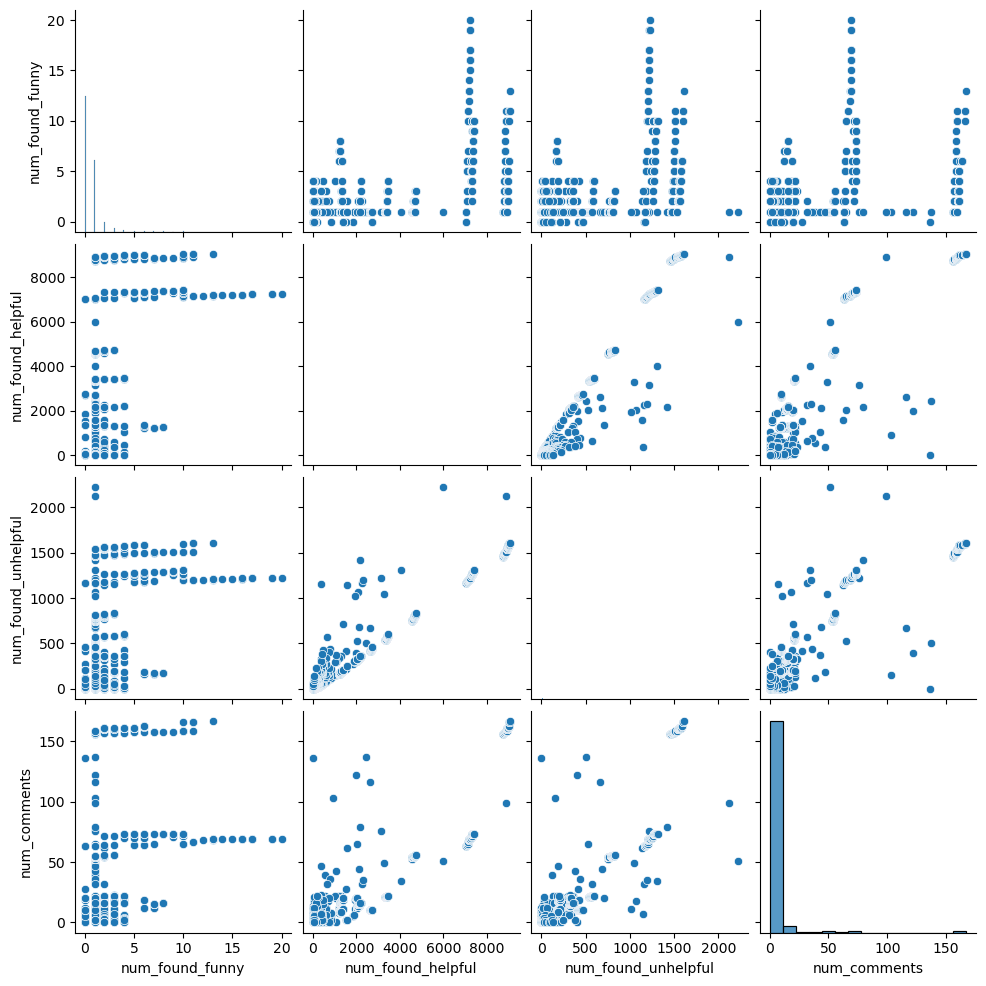

In [17]:
# Review data pairplot
columns = [
        'num_found_funny', 'num_found_helpful', 'num_found_unhelpful',
        'num_comments'
    ]
df_query = df[columns]
sns.pairplot(df_query)

### Reviewer data pairplot

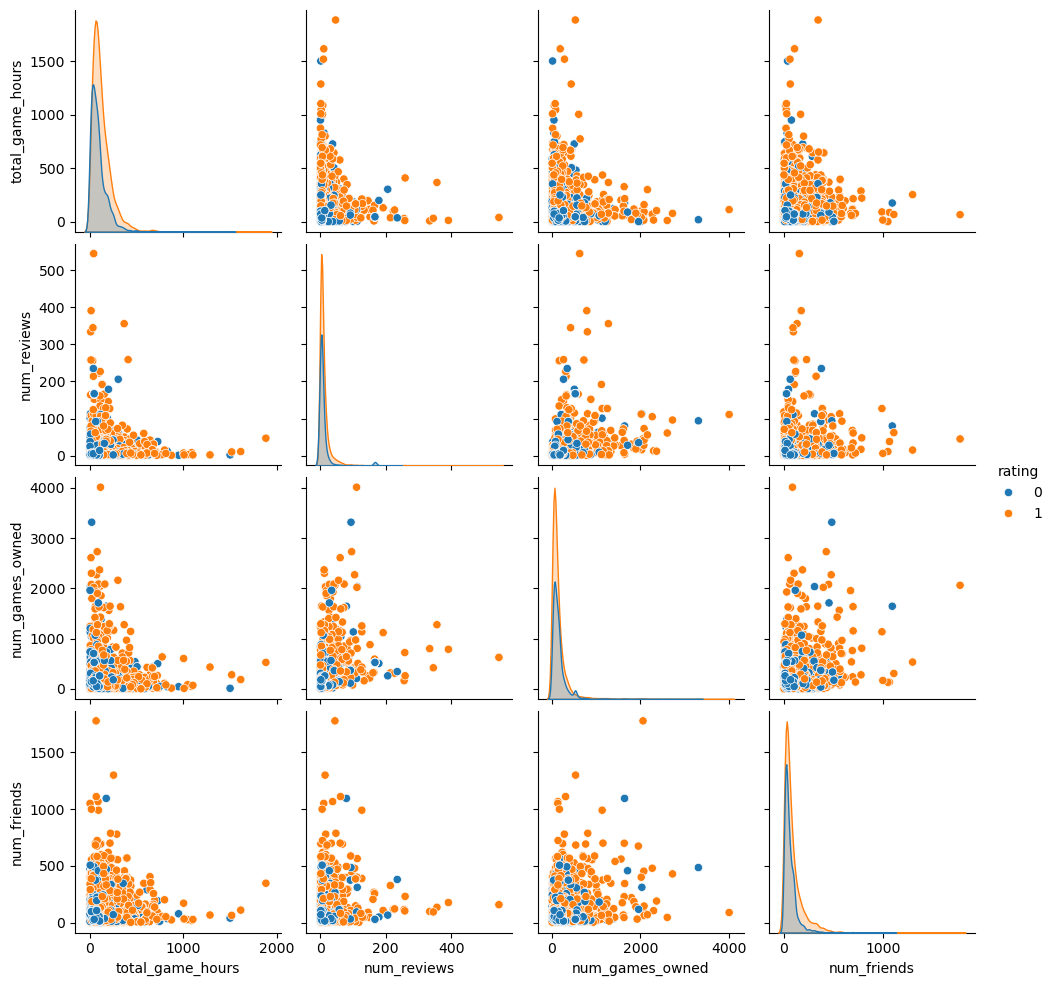

In [20]:
# Reviewer data pairplot
columns = [
        'total_game_hours', 'rating', 'num_reviews',
        'num_games_owned', 'num_friends'
    ]
df_query = df[columns]

sns.pairplot(df_query, hue='rating')

Standardizing the data

In [18]:
df.columns

Index(['num_found_funny', 'num_guides', 'total_game_hours',
       'num_workshop_items', 'num_found_unhelpful', 'num_found_helpful',
       'total_game_hours_last_two_weeks', 'num_comments', 'rating',
       'num_reviews', 'num_groups', 'num_games_owned', 'friend_player_level',
       'found_helpful_percentage', 'num_screenshots', 'review',
       'num_voted_helpfulness', 'num_badges', 'num_friends',
       'num_achievements_percentage'],
      dtype='object')

In [20]:
# Select relevant features for clustering
features = ['num_found_funny', 'total_game_hours', 'num_friends', 'num_comments', 
            'found_helpful_percentage']

In [19]:
# Select relevant features for clustering
features = ['total_game_hours', 'rating', 'num_reviews',
        'num_games_owned', 'num_friends', 'num_found_funny', 'num_found_helpful', 'num_found_unhelpful',
        'num_comments']

### Scaling the data

In [20]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[features])

### Determine the optimal number of clusters using the elbow method

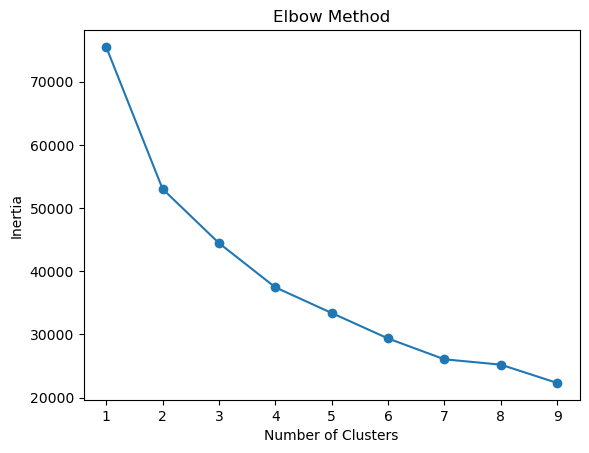

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


### K Means Clustering

In [23]:
# Apply K-Means with optimal k (e.g., 3 clusters)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(data_scaled)

### PCA

In [24]:
from sklearn.decomposition import PCA

# Reduce dimensions with PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

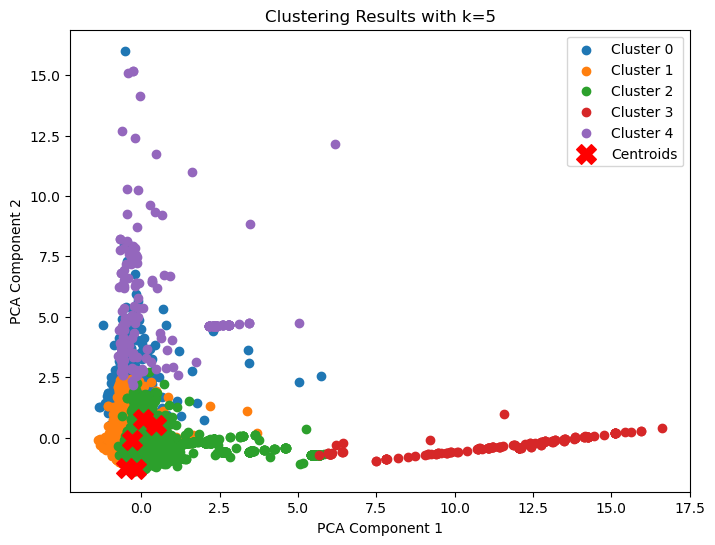

In [25]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in range(k):
    plt.scatter(
        data_pca[df['cluster'] == cluster, 0], 
        data_pca[df['cluster'] == cluster, 1], 
        label=f'Cluster {cluster}'
    )
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=200, c='red', marker='X', label='Centroids'
)
plt.title('Clustering Results with k=5')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [27]:
from mayavi import mlab
from sklearn.decomposition import PCA

# Reduce dimensions with PCA
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_scaled)

x, y, z = data_pca[:, 0], data_pca[:, 1], data_pca[:, 2]
labels = df['cluster'] 

# Map labels to a colormap for visualization

categories = labels.unique()
color_map = {
    category: i for i, category in enumerate(categories)
}
colors = np.array([color_map[label] for label in labels])  # Map labels to integers

# 5. Create 3D scatter plot using Mayavi
mlab.figure(size=(800, 600), bgcolor=(1, 1, 1))  # White background

# Create the scatter plot
points = mlab.points3d(
    x, y, z, 
    colors, 
    scale_factor=0.5, 
    colormap='blue-red', # Choose a colormap
    scale_mode='none'  
)

# Add labels for the axes
mlab.axes(
    xlabel='PCA Component 1',
    ylabel='PCA Component 2',
    zlabel='PCA Component 3'
)
mlab.colorbar(points, title='Label', orientation='vertical')  # Add colorbar
mlab.title('3D PCA Plot')

# Show the plot
mlab.show()

objc[18125]: Class QT_ROOT_LEVEL_POOL__THESE_OBJECTS_WILL_BE_RELEASED_WHEN_QAPP_GOES_OUT_OF_SCOPE is implemented in both /Users/theo/miniforge3/envs/data_project/lib/libQt5Core.5.15.15.dylib (0x3172492f8) and /Users/theo/miniforge3/envs/data_project/lib/libQt6Core.6.7.3.dylib (0x331975558). One of the two will be used. Which one is undefined.
objc[18125]: Class KeyValueObserver is implemented in both /Users/theo/miniforge3/envs/data_project/lib/libQt5Core.5.15.15.dylib (0x317249320) and /Users/theo/miniforge3/envs/data_project/lib/libQt6Core.6.7.3.dylib (0x331975580). One of the two will be used. Which one is undefined.
objc[18125]: Class RunLoopModeTracker is implemented in both /Users/theo/miniforge3/envs/data_project/lib/libQt5Core.5.15.15.dylib (0x317249370) and /Users/theo/miniforge3/envs/data_project/lib/libQt6Core.6.7.3.dylib (0x3319755d0). One of the two will be used. Which one is undefined.


/Users/theo/miniforge3/envs/data_project/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/theo/miniforge3/envs/data_project/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


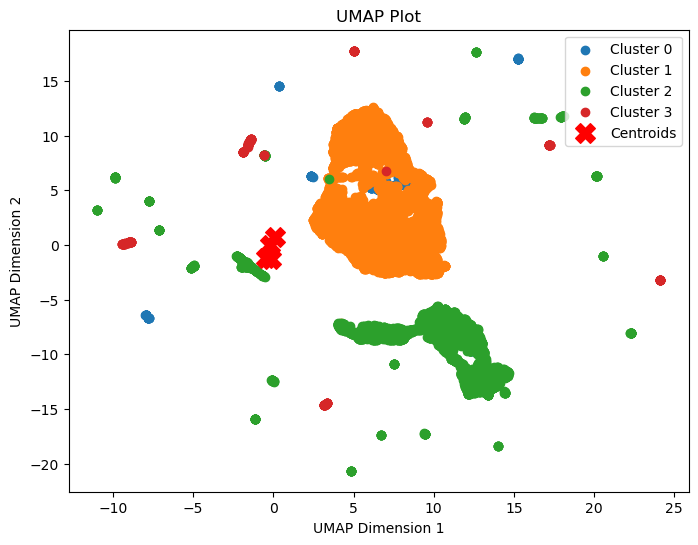

In [25]:
import umap

# Apply UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
data_umap = umap_reducer.fit_transform(data_scaled)


# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in range(k):
    plt.scatter(
        data_umap[df['cluster'] == cluster, 0], 
        data_umap[df['cluster'] == cluster, 1], 
        label=f'Cluster {cluster}'
    )
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=200, c='red', marker='X', label='Centroids'
)
plt.title('UMAP Plot')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend()
plt.show()

In [ ]:
from mayavi import mlab
import umap

# Apply UMAP
umap_reducer = umap.UMAP(n_components=3, random_state=42)
data_umap = umap_reducer.fit_transform(data_scaled)

x, y, z = data_umap[:, 0], data_umap[:, 1], data_umap[:, 2]
labels = df['cluster'] 

# Map labels to a colormap for visualization

categories = labels.unique()
color_map = {
    category: i for i, category in enumerate(categories)
}
colors = np.array([color_map[label] for label in labels])  # Map labels to integers

# 5. Create 3D scatter plot using Mayavi
mlab.figure(size=(800, 600), bgcolor=(200,200,200))  

# Create the scatter plot
points = mlab.points3d(
    x, y, z, 
    colors, 
    scale_factor=0.5, 
    colormap='tab20', # Choose a colormap
    scale_mode='none'  
)

# Add labels for the axes
mlab.axes(
    xlabel='UMAP 1',
    ylabel='UMAP 2',
    zlabel='UMAP 3'
)

mlab.title('3D UMAP Plot')

# Show the plot
mlab.show()

/Users/theo/miniforge3/envs/data_project/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
libpng warning: iCCP: known incorrect sRGB profile


: 

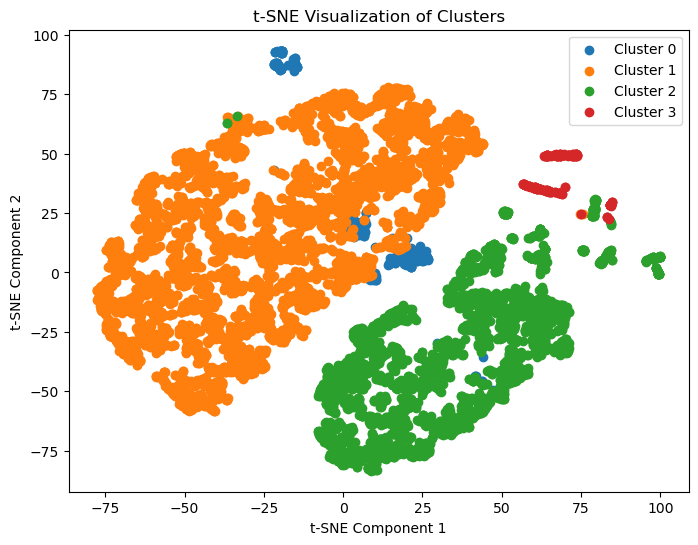

In [26]:
from sklearn.manifold import TSNE

# Reduce dimensions with t-SNE
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in range(k):
    plt.scatter(
        data_tsne[df['cluster'] == cluster, 0], 
        data_tsne[df['cluster'] == cluster, 1], 
        label=f'Cluster {cluster}'
    )
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


In [27]:
from mayavi import mlab
from sklearn.manifold import TSNE

# Reduce dimensions with t-SNE
tsne = TSNE(n_components=3, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)

x, y, z = data_tsne[:, 0], data_tsne[:, 1], data_tsne[:, 2]
labels = df['cluster'] 

# Map labels to a colormap for visualization

categories = labels.unique()
color_map = {
    category: i for i, category in enumerate(categories)
}
colors = np.array([color_map[label] for label in labels])  # Map labels to integers

# 5. Create 3D scatter plot using Mayavi
mlab.figure(size=(800, 600), bgcolor=(1, 1, 1))  # White background

# Create the scatter plot
points = mlab.points3d(
    x, y, z, 
    colors, 
    scale_factor=0.5, 
    colormap='blue-red', # Choose a colormap
    scale_mode='none'  
)

# Add labels for the axes
mlab.axes(
    xlabel='TSNE 1',
    ylabel='TSNE 2',
    zlabel='TSNE 3'
)
mlab.colorbar(points, title='Label', orientation='vertical')  # Add colorbar
mlab.title('3D TSNE Plot')

# Show the plot
mlab.show()


objc[62762]: Class QT_ROOT_LEVEL_POOL__THESE_OBJECTS_WILL_BE_RELEASED_WHEN_QAPP_GOES_OUT_OF_SCOPE is implemented in both /Users/theo/miniforge3/envs/data_project/lib/libQt5Core.5.15.15.dylib (0x1697492f8) and /Users/theo/miniforge3/envs/data_project/lib/libQt6Core.6.7.3.dylib (0x32dc71558). One of the two will be used. Which one is undefined.
objc[62762]: Class KeyValueObserver is implemented in both /Users/theo/miniforge3/envs/data_project/lib/libQt5Core.5.15.15.dylib (0x169749320) and /Users/theo/miniforge3/envs/data_project/lib/libQt6Core.6.7.3.dylib (0x32dc71580). One of the two will be used. Which one is undefined.
objc[62762]: Class RunLoopModeTracker is implemented in both /Users/theo/miniforge3/envs/data_project/lib/libQt5Core.5.15.15.dylib (0x169749370) and /Users/theo/miniforge3/envs/data_project/lib/libQt6Core.6.7.3.dylib (0x32dc715d0). One of the two will be used. Which one is undefined.
libpng warning: iCCP: known incorrect sRGB profile


### Stress Calculation for embedders

In [31]:
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import pairwise_distances

# Function to calculate stress
def calculate_stress(orig_dist, embedded_dist):
    return np.sqrt(np.sum((orig_dist - embedded_dist)**2)) / np.sqrt(np.sum(orig_dist**2))

# Function to create Shepard diagram
def plot_shepard_diagram(ax, original_distances, embedded_distances, method_name):
    # Flatten the distance matrices
    orig_dist_flat = original_distances[np.triu_indices(original_distances.shape[0], k=1)]
    emb_dist_flat = embedded_distances[np.triu_indices(embedded_distances.shape[0], k=1)]

    # Calculate stress
    stress = calculate_stress(orig_dist_flat, emb_dist_flat)

    # Calculate Spearman correlation
    correlation, _ = spearmanr(orig_dist_flat, emb_dist_flat)

    # Create scatter plot
    ax.scatter(orig_dist_flat, emb_dist_flat, alpha=0.5, s=20)

    # Add perfect correlation line
    min_dist = min(orig_dist_flat.min(), emb_dist_flat.min())
    max_dist = max(orig_dist_flat.max(), emb_dist_flat.max())
    ax.plot([min_dist, max_dist], [min_dist, max_dist], 'r--', alpha=0.8)

    ax.set_xlabel('Original Distances')
    ax.set_ylabel('Embedded Distances')
    ax.set_title(f'{method_name}\nStress: {stress:.3f}, Correlation: {correlation:.3f}')


In [43]:
from sklearn.manifold import MDS, Isomap
# Features and labels
labels = df['cluster']  # Second column contains labels (species)
features = data_scaled  # All other columns except column 2


# Unique species and colors
unique_species = labels.unique()
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_species)))

# Original pairwise distances
original_distances = pairwise_distances(features)

# Dimensionality reduction methods
embeddings = {
    'PCA': PCA(n_components=2).fit_transform(features),
    't-SNE': TSNE(n_components=2, random_state=42).fit_transform(features),
    'UMAP': umap.UMAP(n_components=2, random_state=42).fit_transform(features),
    #'MDS': MDS(n_components=2, random_state=42).fit_transform(features),
    'Isomap': Isomap(n_components=2).fit_transform(features)
}

# Pairwise distances in embedding spaces
embedded_distances = {
    method: pairwise_distances(embedding)
    for method, embedding in embeddings.items()
}

/Users/theo/miniforge3/envs/data_project/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/theo/miniforge3/envs/data_project/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 26 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/theo/miniforge3/envs/data_project/lib/python3.10/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/theo/miniforge3/envs/data_project/lib/python3.10/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_int


Stress values:
--------------------------------------------------
PCA: 0.402
t-SNE: 18.294
UMAP: 2.158
Isomap: 1.981


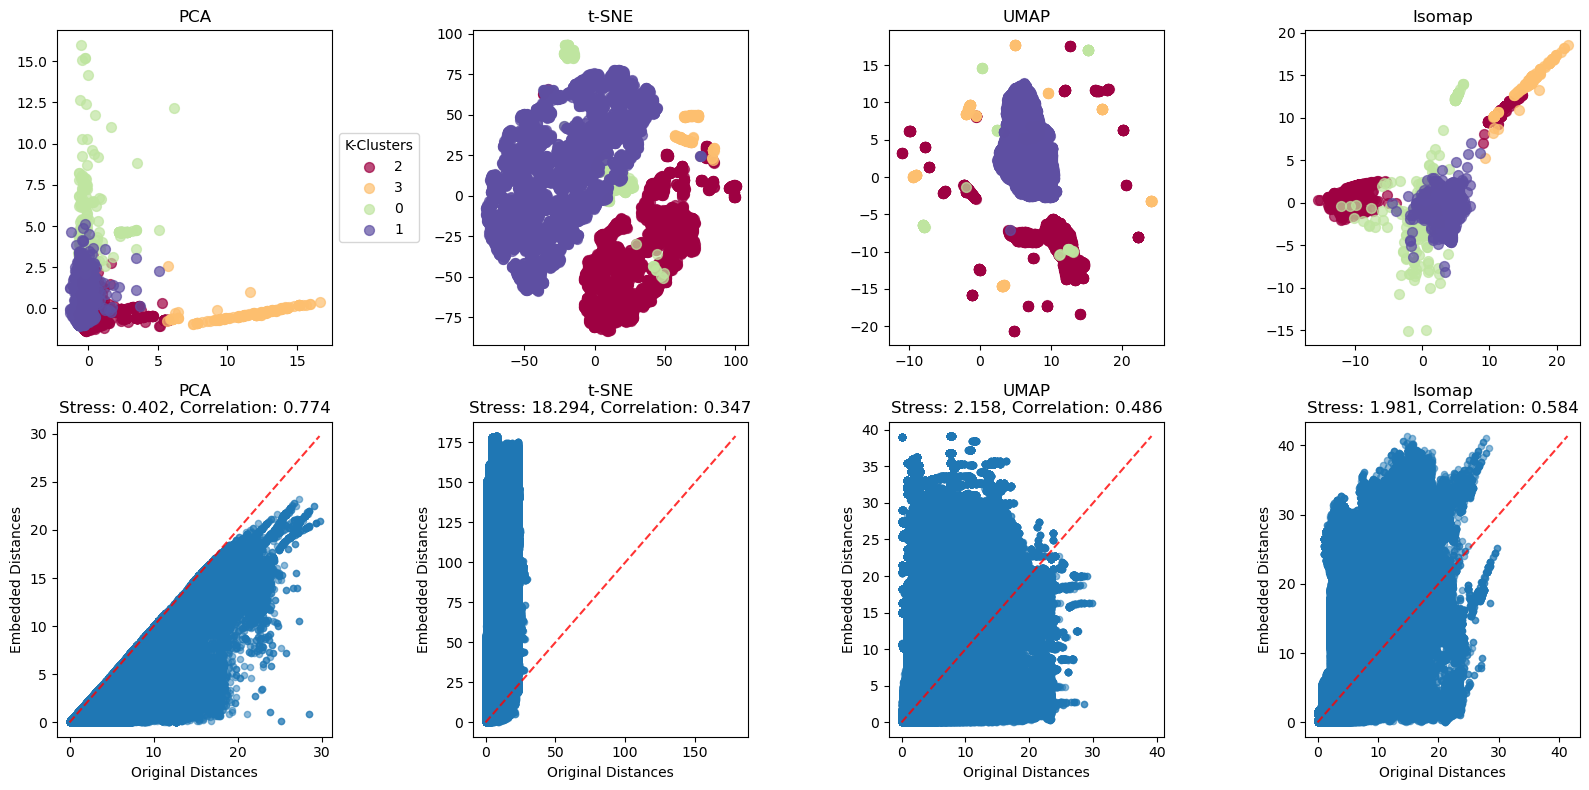

In [44]:
# Visualization
fig = plt.figure(figsize=(16, 8))
n_methods = len(embeddings)

for idx, (method, embedding) in enumerate(embeddings.items()):
    # Top row: Projection plot
    ax_proj = plt.subplot(2, n_methods, idx + 1)
    for i, species in enumerate(unique_species):
        species_mask = labels == species
        ax_proj.scatter(
            embedding[species_mask, 0],
            embedding[species_mask, 1],
            c=[colors[i]],
            label=species,
            s=50,
            alpha=0.7
        )
    ax_proj.set_title(method)
    if idx == 0:
        ax_proj.legend(title="K-Clusters", loc="center left", bbox_to_anchor=(1, 0.5))

    # Bottom row: Shepard diagram
    ax_shep = plt.subplot(2, n_methods, idx + n_methods + 1)
    plot_shepard_diagram(ax_shep, original_distances, embedded_distances[method], method)

# Print stress values
print("\nStress values:")
print("-" * 50)
for method, distances in embedded_distances.items():
    stress = calculate_stress(original_distances, distances)
    print(f"{method}: {stress:.3f}")

plt.tight_layout()
plt.show()


## Hierarchical Clustering

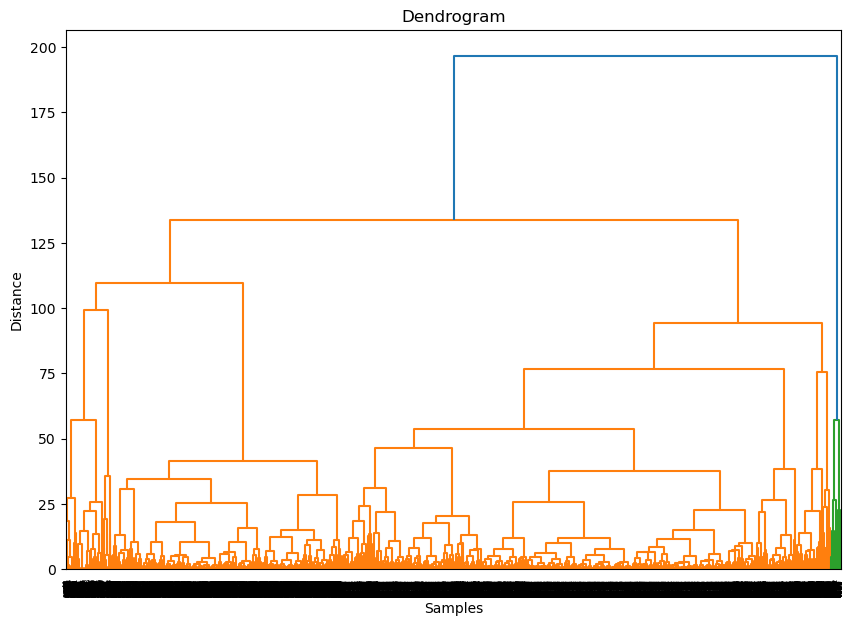

In [45]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering
linked = linkage(data_scaled, method='ward', metric='euclidean')  # 'ward' minimizes variance

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

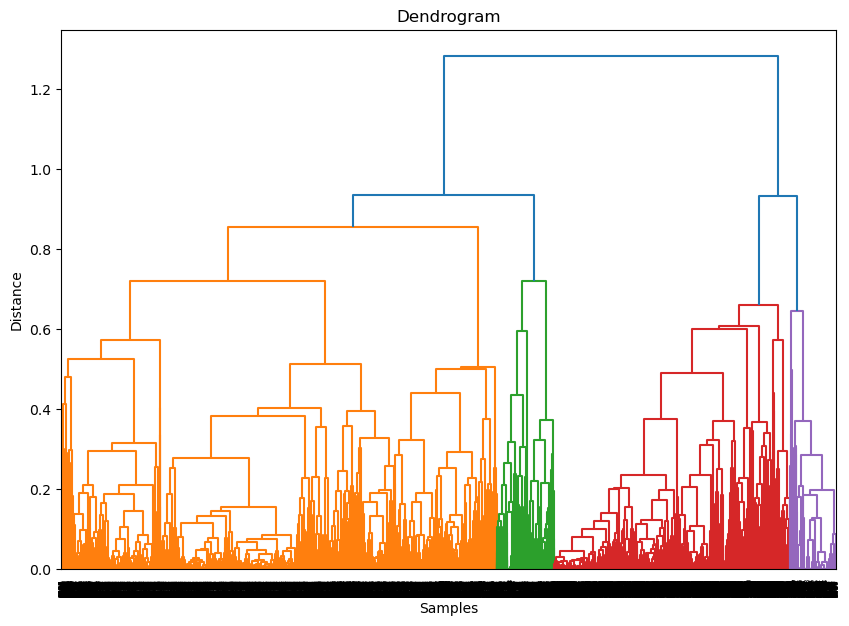

In [51]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering
linked = linkage(data_scaled, method='average', metric='cosine')  

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

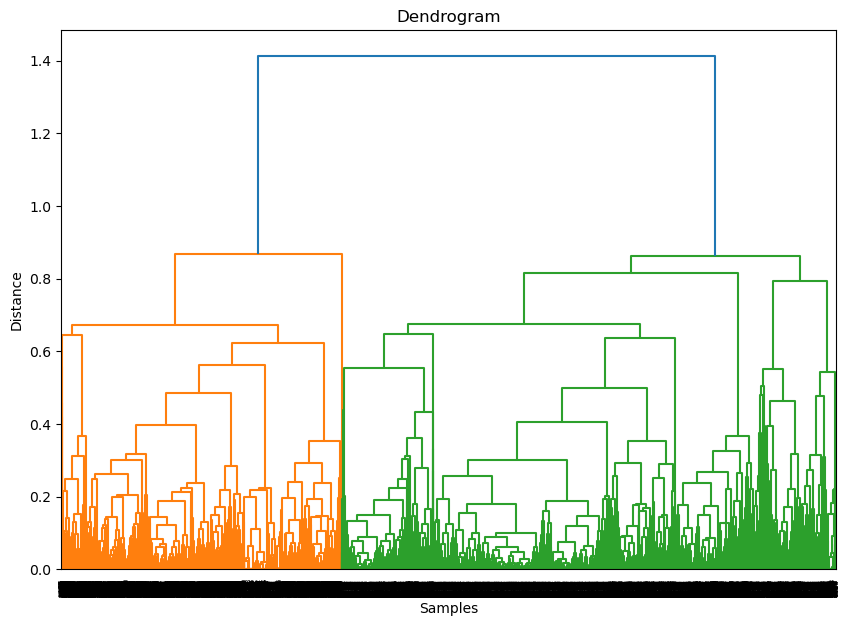

In [54]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering
linked = linkage(data_scaled, method='average', metric='correlation')  

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

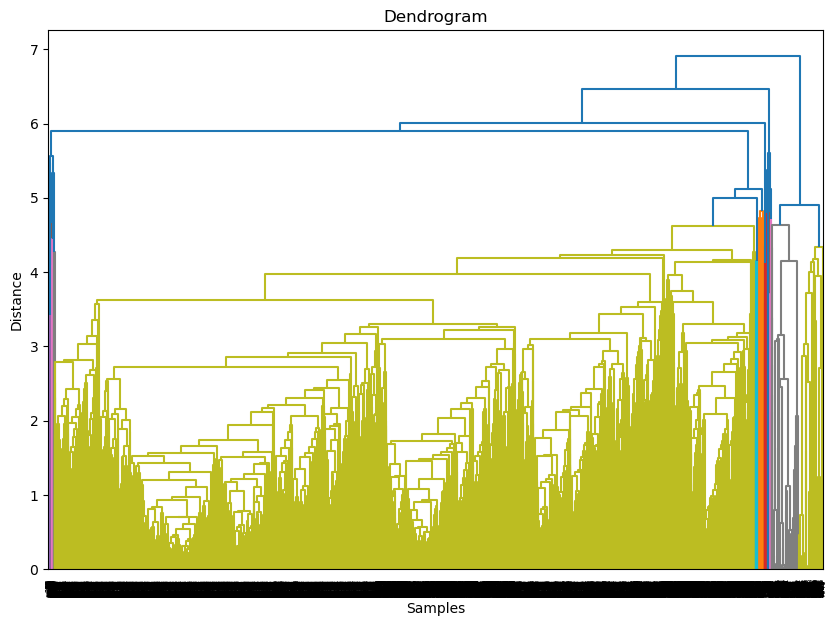

In [55]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering
linked = linkage(data_scaled, method='average', metric='canberra')  

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [56]:
from sklearn.cluster import AgglomerativeClustering

# Cut the dendrogram to form clusters (e.g., 5 clusters)
# hierarchical = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
# hierarchical = AgglomerativeClustering(n_clusters=6, metric='correlation', linkage='complete')
# hierarchical = AgglomerativeClustering(n_clusters=4, metric='correlation', linkage='average')
hierarchical = AgglomerativeClustering(n_clusters=6, metric='cosine', linkage='average')
df['hierarchical_cluster'] = hierarchical.fit_predict(data_scaled)

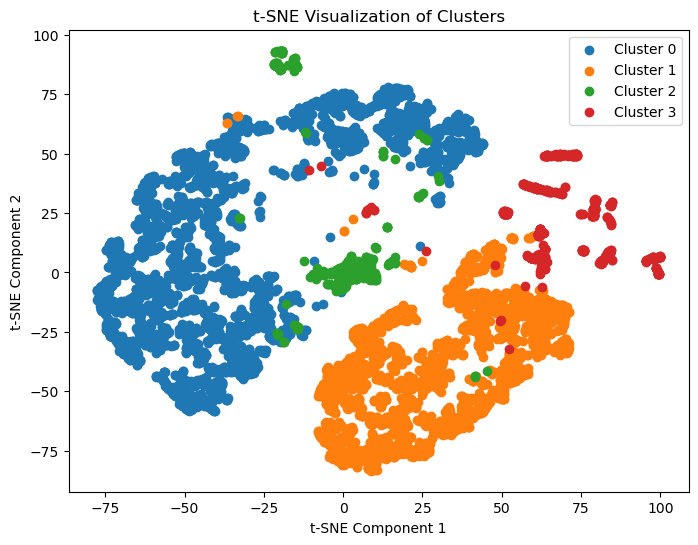

In [57]:
from sklearn.manifold import TSNE

# Reduce dimensions with t-SNE
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in range(k):
    plt.scatter(
        data_tsne[df['hierarchical_cluster'] == cluster, 0], 
        data_tsne[df['hierarchical_cluster'] == cluster, 1], 
        label=f'Cluster {cluster}'
    )
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

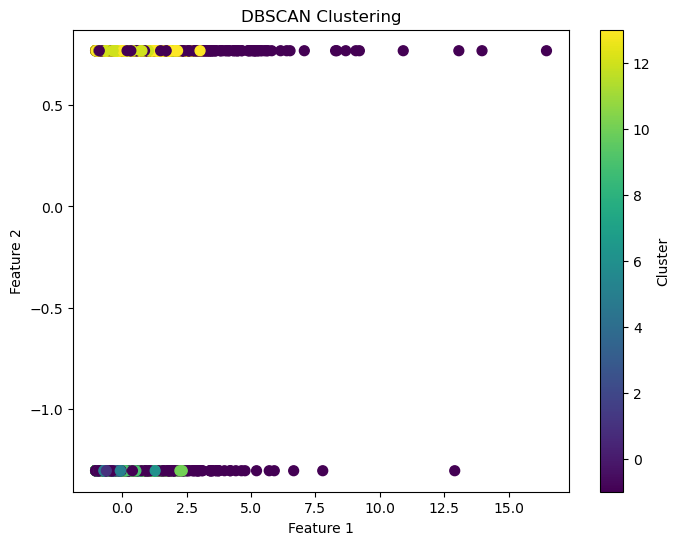

In [26]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=25, gen_min_span_tree=True)
df['hdbscan_cluster'] = clusterer.fit_predict(data_scaled)

# Check cluster labels (-1 indicates noise)
#print(df['hdbscan_cluster'].value_counts())

# Plot DBSCAN clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=df['hdbscan_cluster'], cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()


/var/folders/78/h5q_zlz123d11y9zm52f2p4c0000gn/T/ipykernel_61824/4026845878.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('tab20', k)  # Choose a colormap with k colors


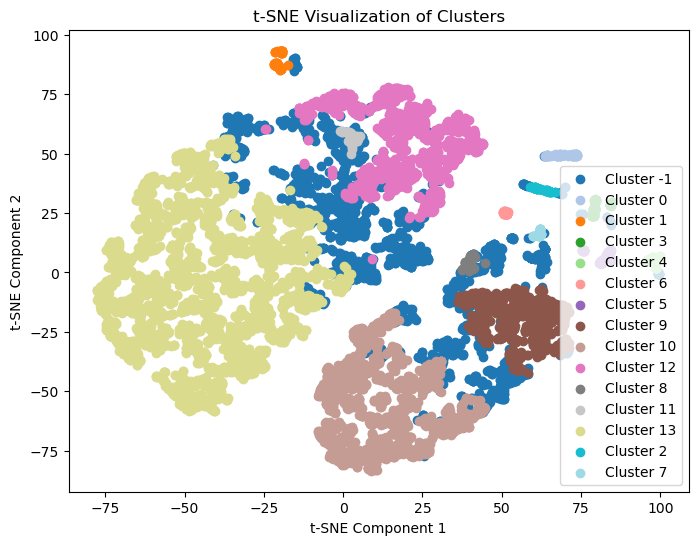

In [29]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.cm as cm

# Reduce dimensions with t-SNE
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)

# Define the number of clusters and a colormap
unique_clusters = df['hdbscan_cluster'].unique()
k = len(unique_clusters)
colormap = cm.get_cmap('tab20', k)  # Choose a colormap with k colors

# Plot the clusters
plt.figure(figsize=(8, 6))
for idx, cluster in enumerate(unique_clusters):
    # Get the color from the colormap
    color = colormap(idx)
    cluster_mask = df['hdbscan_cluster'] == cluster
    
    # Scatter plot for each cluster
    plt.scatter(
        data_tsne[cluster_mask, 0], 
        data_tsne[cluster_mask, 1], 
        color=color, 
        label=f'Cluster {cluster}'
    )

# Add plot labels and legend
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


In [30]:
from mayavi import mlab
from sklearn.manifold import TSNE

# Reduce dimensions with t-SNE
tsne = TSNE(n_components=3, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)

x, y, z = data_tsne[:, 0], data_tsne[:, 1], data_tsne[:, 2]
labels = df['hdbscan_cluster'] 

# Map labels to a colormap for visualization

categories = labels.unique()
color_map = {
    category: i for i, category in enumerate(categories)
}
colors = np.array([color_map[label] for label in labels])  # Map labels to integers

# 5. Create 3D scatter plot using Mayavi
mlab.figure(size=(800, 600), bgcolor=(0.5, 0.5, 0.5))  # White background

# Create the scatter plot
points = mlab.points3d(
    x, y, z, 
    colors, 
    scale_factor=0.5, 
    colormap='Vega20c', # Choose a colormap
    scale_mode='none'  
)

# Add labels for the axes
mlab.axes(
    xlabel='TSNE 1',
    ylabel='TSNE 2',
    zlabel='TSNE 3'
)
mlab.scalarbar(points, title='Clusters', orientation='vertical', nb_colors=14, nb_labels=14)  # Add colorbar
mlab.title('3D TSNE Plot', size=0.3, height=0.85)

# Show the plot
mlab.show()
# mlab.view(azimuth=45, elevation=30, distance=10)
# mlab.savefig('custom_view.png')

libpng warning: iCCP: known incorrect sRGB profile
2024-12-15 22:22:18.869 ( 750.296s) [          12B417]         vtkGlyph3D.cxx:225   WARN| vtkGlyph3D (0x340d76db0): Turning indexing off: no data to index with


In [ ]:
from mayavi import mlab
from sklearn.manifold import Isomap

# Reduce dimensions with IsoMap
isomap = Isomap(n_components=3, n_neighbors=10)
data_isomap = isomap.fit_transform(data_scaled)

x, y, z = data_isomap[:, 0], data_isomap[:, 1], data_isomap[:, 2]
labels = df['hdbscan_cluster'] 

# Map labels to a colormap for visualization

categories = labels.unique()
color_map = {
    category: i for i, category in enumerate(categories)
}
colors = np.array([color_map[label] for label in labels])  # Map labels to integers

# 5. Create 3D scatter plot using Mayavi
mlab.figure(size=(800, 600), bgcolor=(1, 1, 1))  # White background

# Create the scatter plot
points = mlab.points3d(
    x, y, z, 
    colors, 
    scale_factor=0.5, 
    colormap='blue-red', # Choose a colormap
    scale_mode='none'  
)

# Add labels for the axes
mlab.axes(
    xlabel='Isomap 1',
    ylabel='Isomap 2',
    zlabel='Isomap 3'
)
mlab.colorbar(points, title='Label', orientation='vertical')  # Add colorbar
mlab.title('3D Isomap Plot')

# Show the plot
mlab.show()

/Users/theo/miniforge3/envs/data_project/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/theo/miniforge3/envs/data_project/lib/python3.10/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/theo/miniforge3/envs/data_project/lib/python3.10/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/theo/miniforge3/envs/data_project/lib/python3.10/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix 

/Users/theo/miniforge3/envs/data_project/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


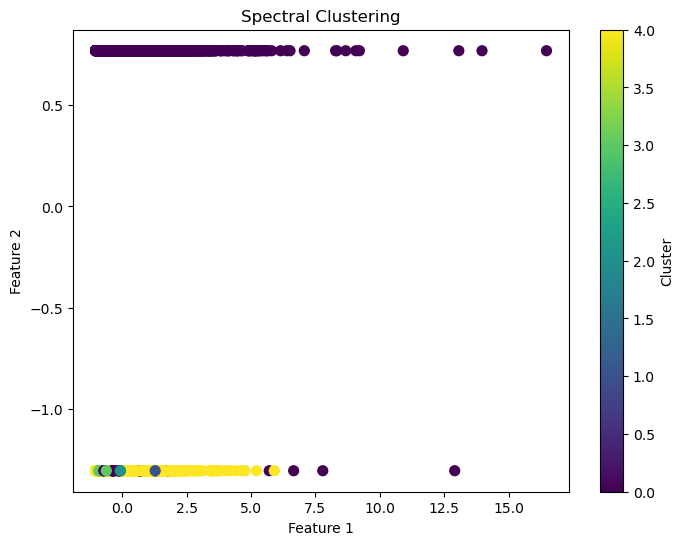

In [63]:
from sklearn.cluster import SpectralClustering

# Perform Spectral Clustering
spectral = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', random_state=42)
df['spectral_cluster'] = spectral.fit_predict(data_scaled)

# Visualize Spectral Clustering
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=df['spectral_cluster'], cmap='viridis', s=50)
plt.title('Spectral Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()


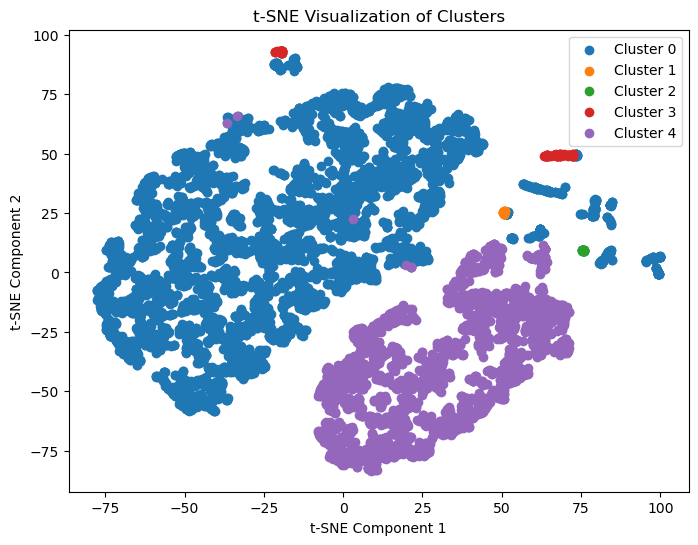

In [64]:
from sklearn.manifold import TSNE

# Reduce dimensions with t-SNE
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
k = len(df['spectral_cluster'].unique())
for cluster in range(k):
    plt.scatter(
        data_tsne[df['spectral_cluster'] == cluster, 0], 
        data_tsne[df['spectral_cluster'] == cluster, 1], 
        label=f'Cluster {cluster}'
    )
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

## Analysing clusters

In [66]:
# Assuming 'cluster' is the column representing cluster labels
for cluster_id in df['hdbscan_cluster'].unique():
    cluster_data = df[df['hdbscan_cluster'] == cluster_id]
    print(f"Cluster {cluster_id}:")
    print(cluster_data.describe())

Cluster -1:
       num_found_funny   num_guides  total_game_hours  num_workshop_items  \
count      1746.000000  1746.000000       1746.000000         1746.000000   
mean          1.171249     0.457617        165.479038            1.327033   
std           1.846517     2.332450        174.295952            5.505937   
min           0.000000     0.000000          0.200000            0.000000   
25%           0.000000     0.000000         50.925000            0.000000   
50%           1.000000     0.000000        113.000000            0.000000   
75%           1.000000     0.000000        221.275000            0.000000   
max          20.000000    79.000000       1885.500000          142.000000   

       num_found_unhelpful  num_found_helpful  \
count          1746.000000        1746.000000   
mean             57.554410         252.068729   
std             204.535862        1036.865368   
min               0.000000           0.000000   
25%               1.000000           2.000000   


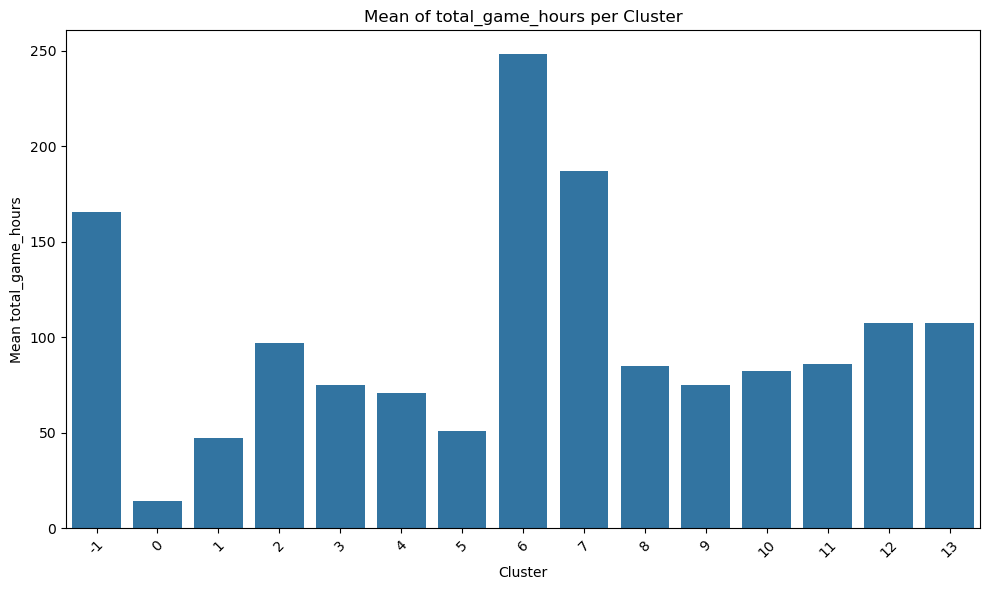

In [67]:
# Specify the column you want to analyze
column_name = 'total_game_hours'  # Replace with the column you're interested in

# Group by clusters and calculate the mean for the specified column
cluster_means = df.groupby('hdbscan_cluster')[column_name].mean()

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_means.index, y=cluster_means.values)

# Customize the plot
plt.title(f'Mean of {column_name} per Cluster')
plt.xlabel('Cluster')
plt.ylabel(f'Mean {column_name}')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

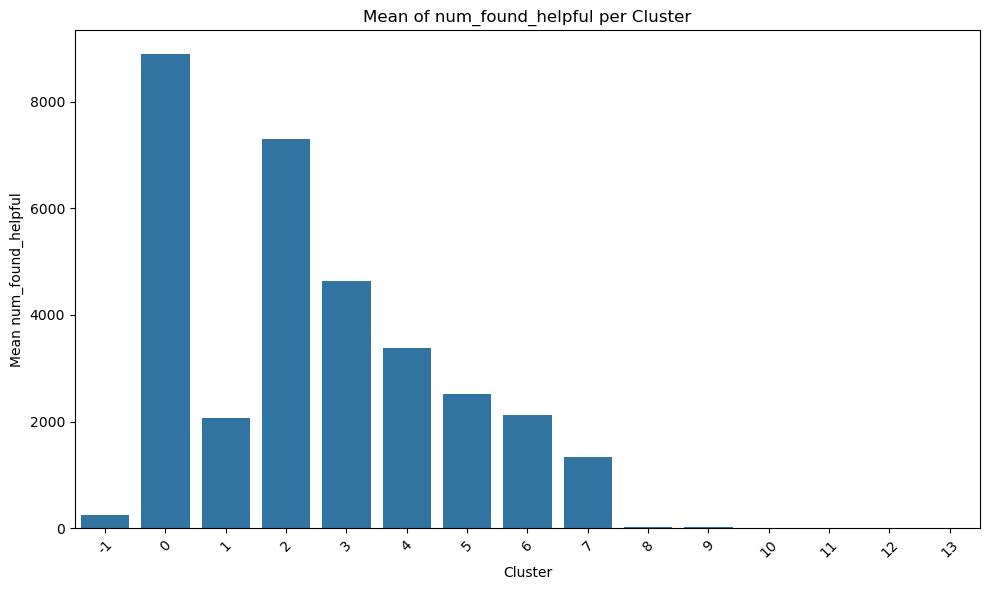

In [68]:
# Specify the column you want to analyze
column_name = 'num_found_helpful'  # Replace with the column you're interested in

# Group by clusters and calculate the mean for the specified column
cluster_means = df.groupby('hdbscan_cluster')[column_name].mean()

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_means.index, y=cluster_means.values)

# Customize the plot
plt.title(f'Mean of {column_name} per Cluster')
plt.xlabel('Cluster')
plt.ylabel(f'Mean {column_name}')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

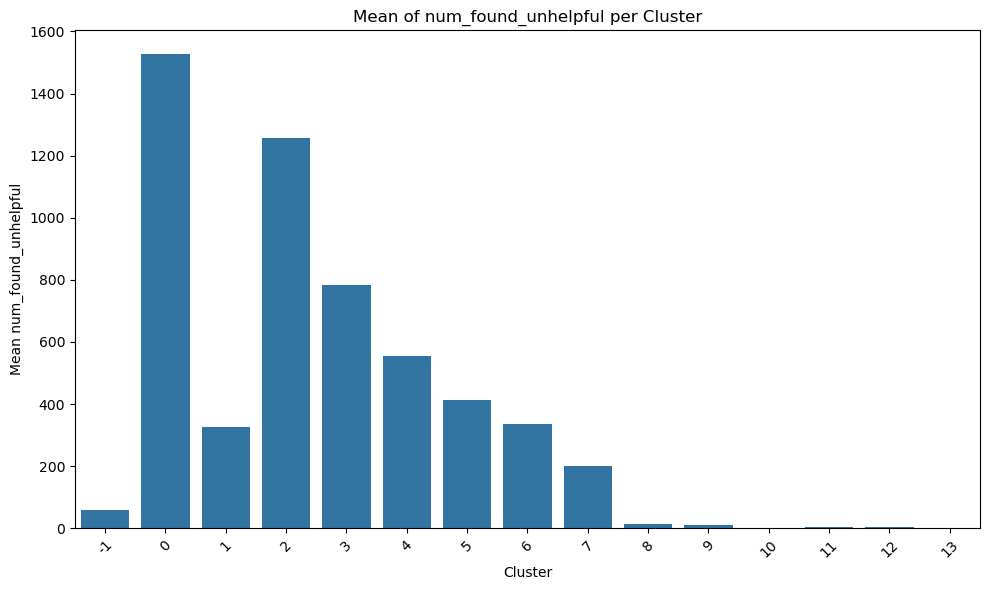

In [71]:
# Specify the column you want to analyze
column_name = 'num_found_unhelpful'  # Replace with the column you're interested in

# Group by clusters and calculate the mean for the specified column
cluster_means = df.groupby('hdbscan_cluster')[column_name].mean()

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_means.index, y=cluster_means.values)

# Customize the plot
plt.title(f'Mean of {column_name} per Cluster')
plt.xlabel('Cluster')
plt.ylabel(f'Mean {column_name}')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

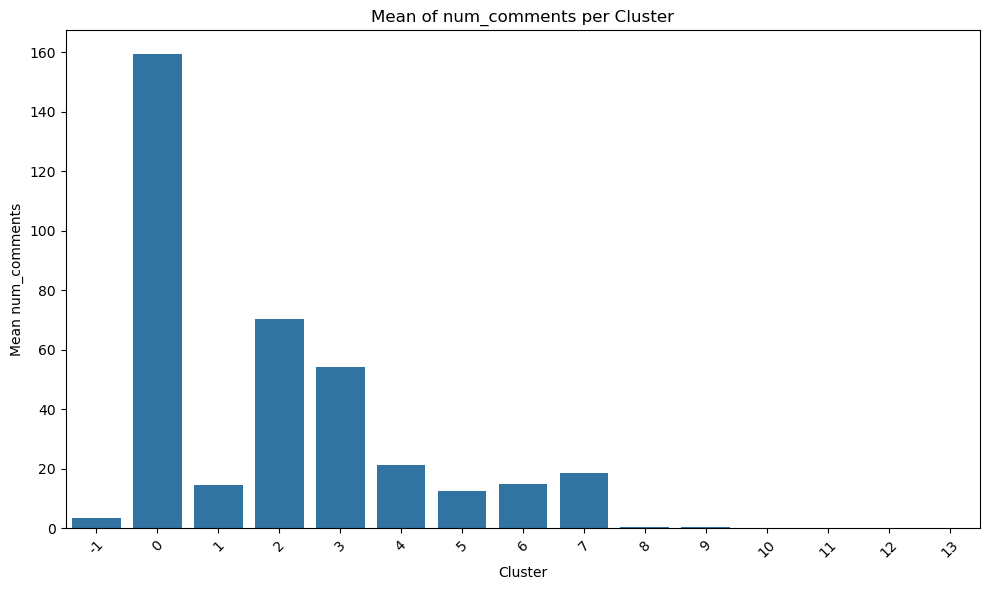

In [69]:
# Specify the column you want to analyze
column_name = 'num_comments'  # Replace with the column you're interested in

# Group by clusters and calculate the mean for the specified column
cluster_means = df.groupby('hdbscan_cluster')[column_name].mean()

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_means.index, y=cluster_means.values)

# Customize the plot
plt.title(f'Mean of {column_name} per Cluster')
plt.xlabel('Cluster')
plt.ylabel(f'Mean {column_name}')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

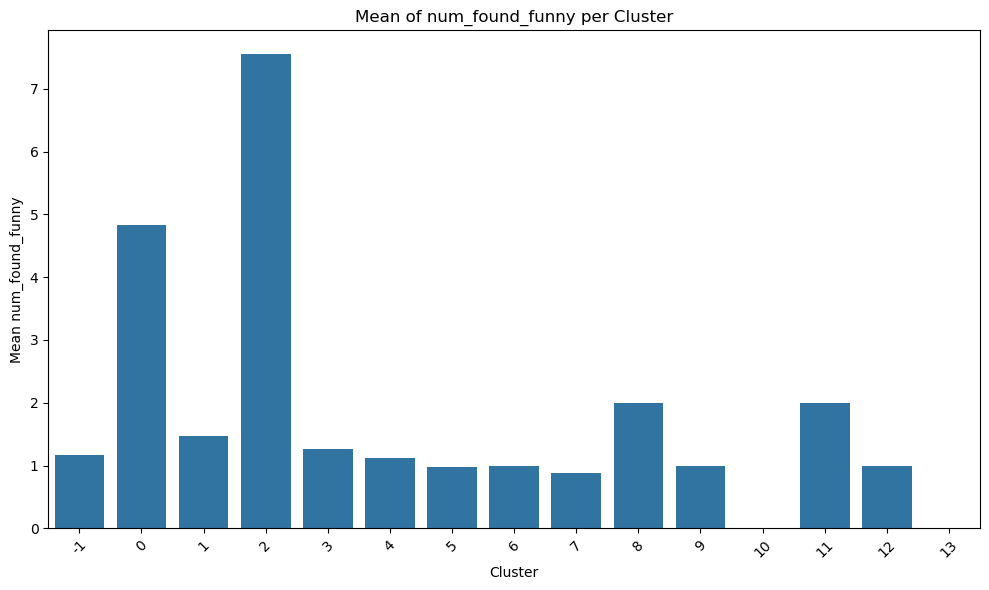

In [72]:
# Specify the column you want to analyze
column_name = 'num_found_funny'  # Replace with the column you're interested in

# Group by clusters and calculate the mean for the specified column
cluster_means = df.groupby('hdbscan_cluster')[column_name].mean()

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_means.index, y=cluster_means.values)

# Customize the plot
plt.title(f'Mean of {column_name} per Cluster')
plt.xlabel('Cluster')
plt.ylabel(f'Mean {column_name}')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

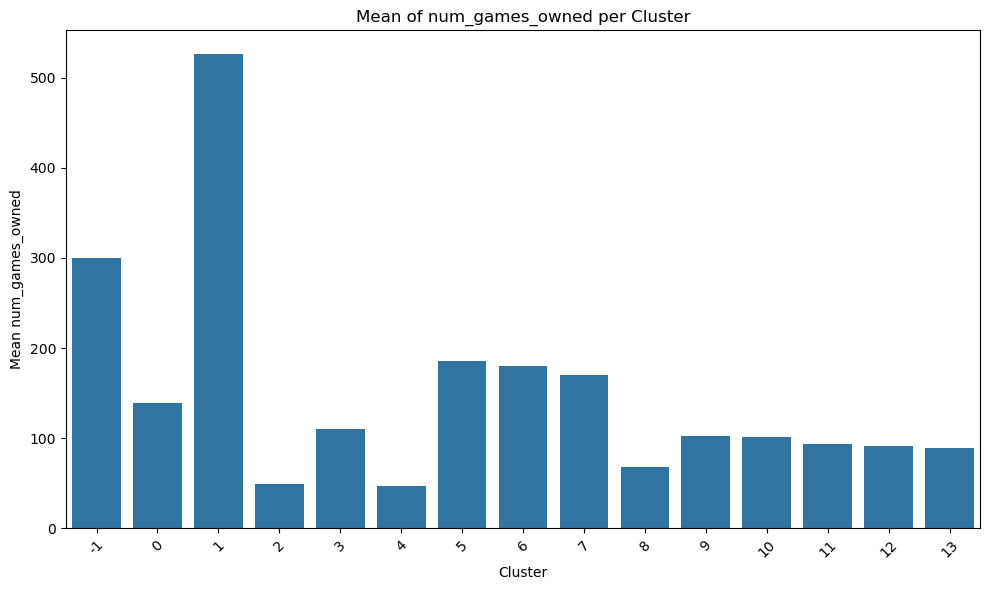

In [73]:
# Specify the column you want to analyze
column_name = 'num_games_owned'  # Replace with the column you're interested in

# Group by clusters and calculate the mean for the specified column
cluster_means = df.groupby('hdbscan_cluster')[column_name].mean()

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_means.index, y=cluster_means.values)

# Customize the plot
plt.title(f'Mean of {column_name} per Cluster')
plt.xlabel('Cluster')
plt.ylabel(f'Mean {column_name}')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

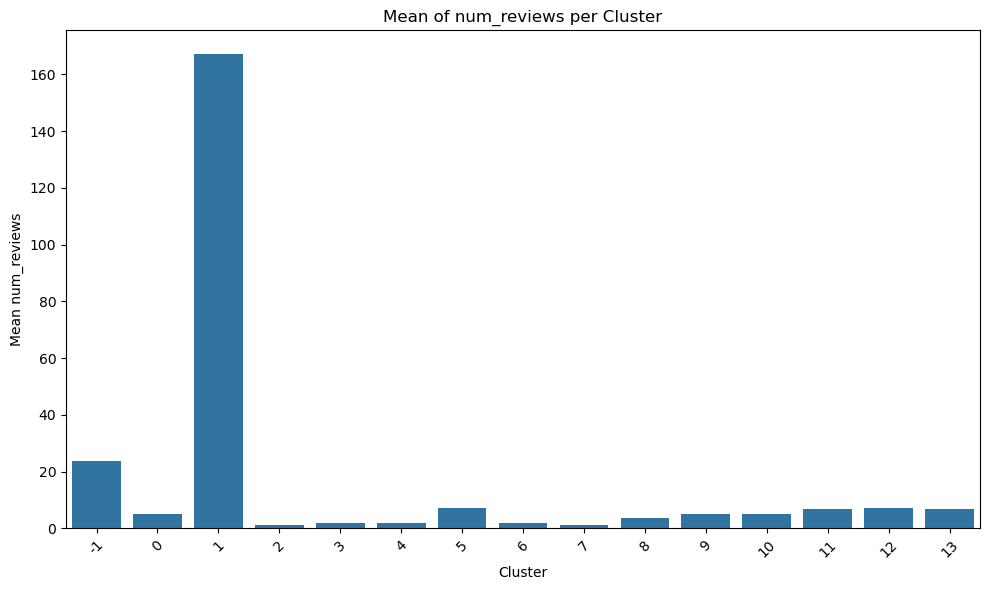

In [74]:
# Specify the column you want to analyze
column_name = 'num_reviews'  # Replace with the column you're interested in

# Group by clusters and calculate the mean for the specified column
cluster_means = df.groupby('hdbscan_cluster')[column_name].mean()

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_means.index, y=cluster_means.values)

# Customize the plot
plt.title(f'Mean of {column_name} per Cluster')
plt.xlabel('Cluster')
plt.ylabel(f'Mean {column_name}')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()